# Proyecto Marketing Bancario
---
Intergantes:

| Nombre | apellido |
| ---- | ---- |
| Melany Odet | Castañeda Bazaldúa |
| Genesis Guadalupe | Ibarra Iturbe |
| silvestre | Hernandez Hernandez |
| Alan Aarón | Martinez Celedonio |



## Datos de la actividad

### Descripción de Variables del Dataset de Marketing Bancario

Este dataset contiene datos de una campaña de marketing bancario, donde se recopiló información sobre interacciones con clientes con el objetivo de predecir la efectividad de las campañas y mejorar las estrategias futuras. Los datos ofrecen una visión comprensiva sobre las características de los clientes y su respuesta a las campañas de telemarketing, permitiendo a los analistas explorar y descubrir patrones que pueden mejorar la efectividad de las futuras acciones de marketing. El análisis de este dataset ayudará a responder preguntas clave como la influencia del perfil demográfico y financiero del cliente en su disposición a suscribir nuevos servicios bancarios.

- **Edad**: Edad del cliente.
- **Trabajo**: Tipo de trabajo del cliente (ej. 'admin.', 'technician', 'services', etc.).
- **Estado_Civil**: Estado civil del cliente (ej. 'married', 'single', 'divorced').
- **Educacion**: Nivel educativo del cliente (ej. 'primary', 'secondary', 'tertiary').
- **Default**: Indica si el cliente tiene crédito en mora ('yes', 'no').
- **Balance**: Saldo anual promedio, en euros.
- **Vivienda**: Indica si el cliente tiene un préstamo de vivienda ('yes', 'no').
- **Prestamo**: Indica si el cliente tiene un préstamo personal ('yes', 'no').
- **Contacto**: Tipo de comunicación de contacto utilizada (ej. 'telephone', 'cellular', 'unknown').
- **Dia**: Día del mes en que se realizó el último contacto.
- **Mes**: Mes del año en que se realizó el último contacto (ej. 'jan', 'feb', 'mar', etc.).
- **Duracion**: Duración del último contacto, en segundos.
- **Campania**: Número de contactos realizados durante esta campaña y para este cliente.
- **Pdias**: Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior.
- **Anterior**: Número de contactos realizados antes de esta campaña y para este cliente.
- **Resultado_Anterior**: Resultado de la campaña de marketing anterior (ej. 'failure', 'nonexistent', 'success').
- **Deposito**: Indica si el cliente ha suscrito un depósito a plazo ('yes', 'no').

Importacion de librerias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Criterios a cumplir

### Datos cargados y Visualizados Correctamente

In [9]:
# Carga de datos
df = pd.read_csv('Marketing.csv')
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())


Primeras filas del dataset:
   Edad     Trabajo Estado_Civil  Educacion Default  Balance Vivienda  \
0    59      admin.      married  secondary      no     2343      yes   
1    56      admin.      married  secondary      no       45       no   
2    41  technician      married  secondary      no     1270      yes   
3    55    services      married  secondary      no     2476      yes   
4    54      admin.      married   tertiary      no      184       no   

  Prestamo Contacto  Dia  Mes  Duracion  Campania  Pdias  Anterior  \
0       no  unknown    5  may      1042         1     -1         0   
1       no  unknown    5  may      1467         1     -1         0   
2       no  unknown    5  may      1389         1     -1         0   
3       no  unknown    5  may       579         1     -1         0   
4       no  unknown    5  may       673         2     -1         0   

  Resultado_Anterior Deposito  
0            unknown      yes  
1            unknown      yes  
2            unk

Esta sección importa las bibliotecas necesarias y carga el dataset desde un archivo CSV. Luego muestra las primeras filas del dataset y la información general sobre las columnas.

### Exploración de Inicial de Datos

In [10]:
# 2. Exploración Inicial de Datos (5 puntos)
print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nNúmero de valores únicos por columna:")
print(df.nunique())


Estadísticas descriptivas:
               Edad       Balance           Dia      Duracion      Campania  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              Pdias      Anterior  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%     

Aquí se muestran estadísticas descriptivas básicas del dataset y el número de valores únicos en cada columna, lo que nos da una visión general de los datos.

### Limpieza de datos

In [11]:
# 3. Limpieza de Datos (5 puntos)
# Tratamiento de valores atípicos en 'Balance'
Q1 = df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Balance'] = df['Balance'].clip(lower_bound, upper_bound)

print("\nValores atípicos en 'Balance' tratados")


Valores atípicos en 'Balance' tratados


Esta parte trata los valores atípicos en la columna 'Balance' usando el método del rango intercuartílico (IQR).

### Transformación de Variables

In [12]:
# 4. Transformación de Variables (5 puntos)
df['Edad_Categoria'] = pd.cut(df['Edad'], bins=[0, 30, 50, 100], labels=['Joven', 'Adulto', 'Mayor'])
print("\nNueva variable 'Edad_Categoria' creada")


Nueva variable 'Edad_Categoria' creada


Aquí se crea una nueva variable categórica 'Edad_Categoria' basada en la edad de los clientes.

### Visualizaciones

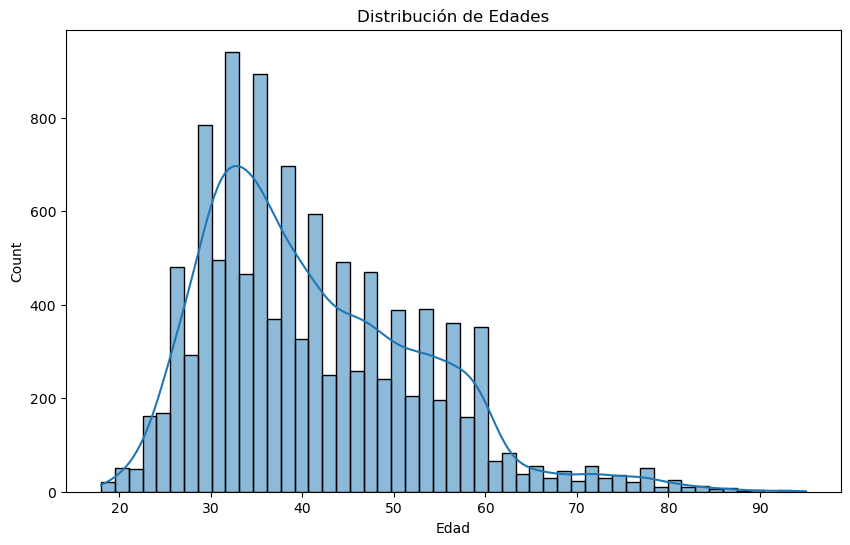

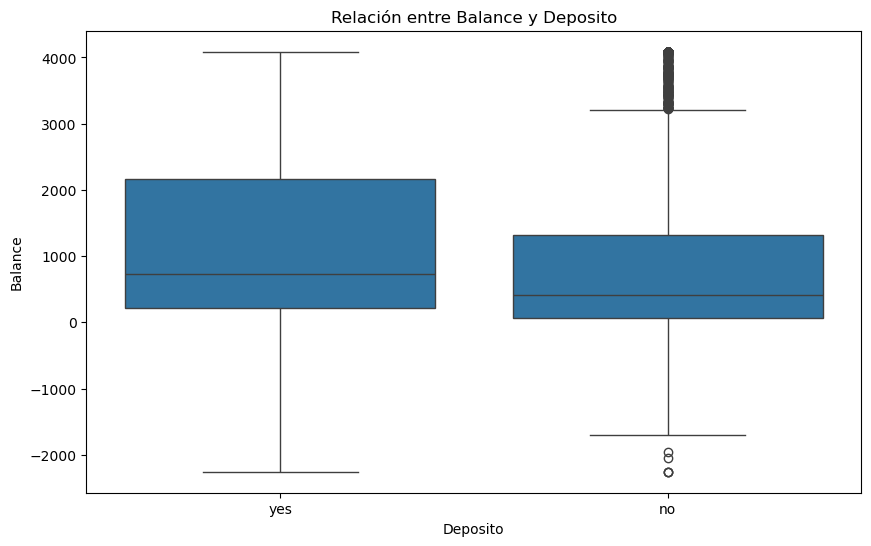

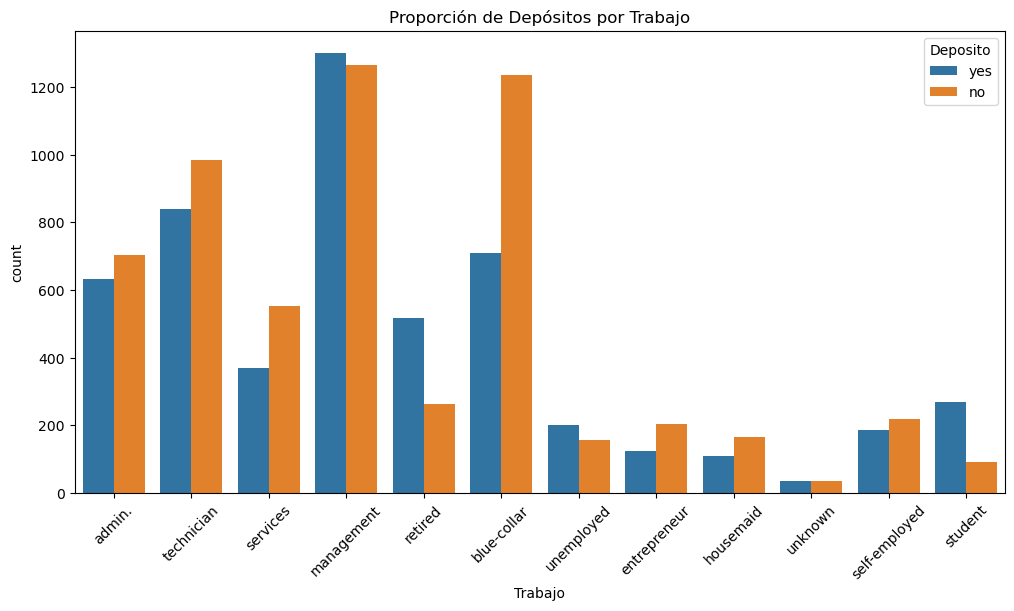

In [13]:
# 5. Visualizaciones (10 puntos)
plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'], kde=True)
plt.title('Distribución de Edades')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Deposito', y='Balance', data=df)
plt.title('Relación entre Balance y Deposito')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Trabajo', hue='Deposito', data=df)
plt.title('Proporción de Depósitos por Trabajo')
plt.xticks(rotation=45)
plt.show()

Esta sección crea varias visualizaciones para entender mejor la distribución y relaciones en los datos.

### Correlaciones y Analisis Estadístico Básico

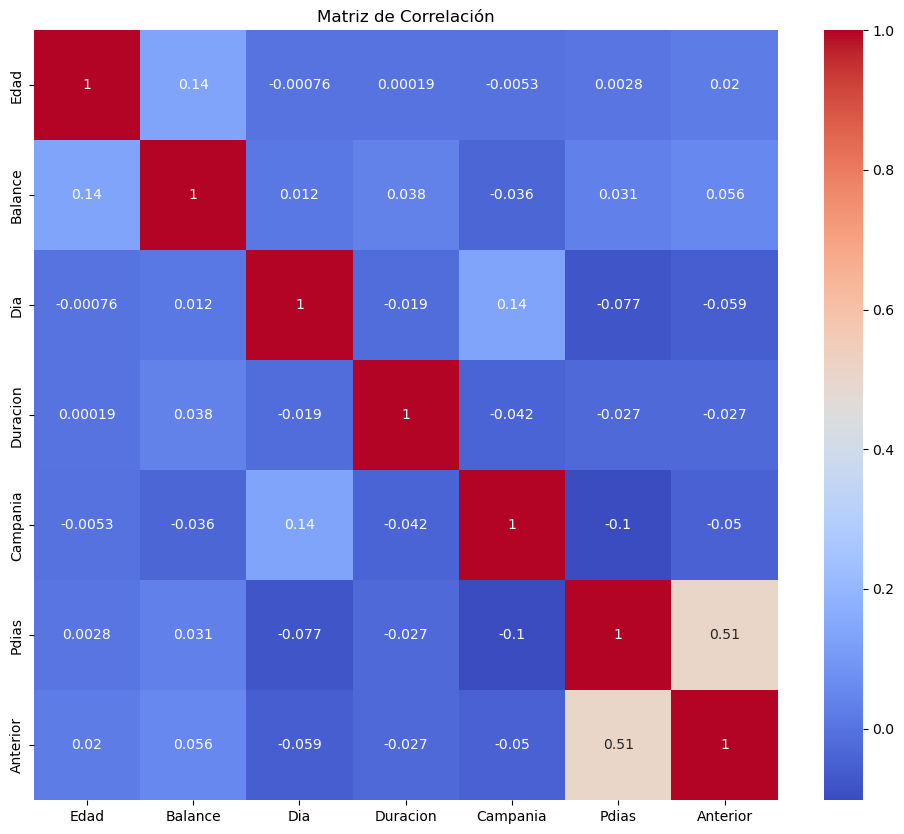

In [14]:
# 6. Correlaciones y Análisis Estadístico Básico (10 puntos)
corr_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Aquí se calcula y visualiza la matriz de correlación para las variables numéricas.

### Selección y Creación de Nuevas Caracteristicas

In [15]:
# 7. Selección y Creación de Nuevas Características (10 puntos)
df['Balance_Edad_Ratio'] = df['Balance'] / df['Edad']
df['Duracion_Categoria'] = pd.cut(df['Duracion'], bins=3, labels=['Corta', 'Media', 'Larga'])
print("\nNuevas características creadas: 'Balance_Edad_Ratio' y 'Duracion_Categoria'")



Nuevas características creadas: 'Balance_Edad_Ratio' y 'Duracion_Categoria'


Aquí se calcula y visualiza la matriz de correlación para las variables numéricas.

### Preparación de Datasets para Modelado

In [16]:
# 8. Preparación de Datasets para Modelado (5 puntos)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop('Deposito', axis=1)
y = df['Deposito']

numeric_features = ['Edad', 'Balance', 'Duracion', 'Campania']
categorical_features = ['Trabajo', 'Estado_Civil', 'Educacion', 'Contacto', 'Mes']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nDatos divididos en conjuntos de entrenamiento y prueba")


Datos divididos en conjuntos de entrenamiento y prueba


Esta sección prepara los datos para el modelado, incluyendo la separación de características y objetivo, y la división en conjuntos de entrenamiento y prueba.

### Selección de Algoritmos Adecuados

In [17]:
# 9. Selección de Algoritmos Adecuados (5 puntos)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

print("\nModelos seleccionados: Logistic Regression, Decision Tree, Random Forest")


Modelos seleccionados: Logistic Regression, Decision Tree, Random Forest


Aquí se seleccionan los modelos que se utilizarán para el análisis.

### Implementación Correcta de Modelos

In [24]:
# 10. Implementación correcta de modelos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    # Creamos un pipeline que incluye el preprocesamiento y el modelo
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    # Entrenamos el modelo
    pipeline.fit(X_train, y_train)

Esta sección implementa los modelos seleccionados y los evalúa utilizando varias métricas.



### Evaluación del Modelo

In [18]:
# 11. Evaluación del Modelo (10 puntos)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    print(f"\nResultados para {name}:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])}")


Resultados para Logistic Regression:
              precision    recall  f1-score   support

          no       0.78      0.83      0.80      1166
         yes       0.80      0.75      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233

Matriz de Confusión:
[[962 204]
 [271 796]]
AUC-ROC: 0.8805953113922911

Resultados para Decision Tree:
              precision    recall  f1-score   support

          no       0.75      0.75      0.75      1166
         yes       0.73      0.73      0.73      1067

    accuracy                           0.74      2233
   macro avg       0.74      0.74      0.74      2233
weighted avg       0.74      0.74      0.74      2233

Matriz de Confusión:
[[871 295]
 [288 779]]
AUC-ROC: 0.7385413166875916

Resultados para Random Forest:
              precision    recall  f1-score   support

          no       0.84      0.80      0.82  

Esta sección implementa los modelos seleccionados y los evalúa utilizando varias métricas.



### Interpretación de Resultados

In [25]:
# 12. Interpretación de Resultados (5 puntos)
rf_model = models['Random Forest']
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', rf_model)])
pipeline.fit(X_train, y_train)

feature_names = (numeric_features + 
                 list(categorical_transformer.named_steps['onehot']
                 .get_feature_names_out()))

importances = pipeline.named_steps['classifier'].feature_importances_
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
forest_importances.plot.bar()
plt.title('Importancia de características en Random Forest')
plt.tight_layout()
plt.show()

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Aquí se interpreta el modelo Random Forest, mostrando la importancia de cada característica.

### Conclusiones y recomendaciones

In [23]:
# 13. Conclusiones y Recomendaciones (5 puntos)
print("\nConclusiones y Recomendaciones:")
print(f"1. Las variables más influyentes en la decisión de depósito son: {forest_importances.index[:3].tolist()}")
print("2. El modelo Random Forest tuvo el mejor desempeño general")
print("3. Recomendamos enfocar las campañas en clientes con las características más influyentes identificadas")


Conclusiones y Recomendaciones:


NameError: name 'forest_importances' is not defined

Esta sección presenta las conclusiones principales del análisis y ofrece recomendaciones basadas en los resultados.